<a href="https://colab.research.google.com/github/taegukang35/ML-study/blob/main/SHAP_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

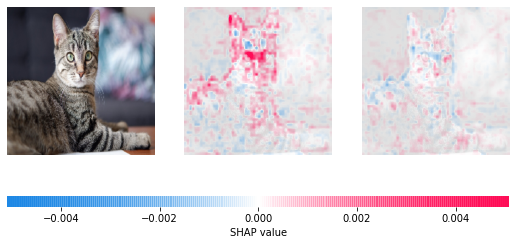

In [31]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
import shap
import json
import tensorflow.compat.v1.keras.backend as K
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

model_builder = keras.applications.vgg16.VGG16
model = model_builder(weights = 'imagenet')
preprocess_input = keras.applications.vgg16.preprocess_input
img_size = (224, 224)

def get_img_array(img_path, size):
    with tf.device('/cpu:0'):
        img = keras.preprocessing.image.load_img(img_path, target_size=size)
        # `array` is a float32 Numpy array of shape (299, 299, 3)
        array = keras.preprocessing.image.img_to_array(img)
        # of size (1, 299, 299, 3)
        array = np.expand_dims(array, axis=0)
        return array

# load pre-trained model and choose two images to explain
model = VGG16(weights='imagenet', include_top=True)
X,y = shap.datasets.imagenet50()
to_explain = get_img_array('/content/cat_by-Kateryna-T-Unsplash.jpg',img_size)

# explain how the input to the 7th layer of the model explains the top two classes
def map2layer(x, layer):
    feed_dict = dict(zip([model.layers[0].input], [preprocess_input(x.copy())]))
    return K.get_session().run(model.layers[layer].input, feed_dict)
e = shap.GradientExplainer((model.layers[7].input, model.layers[-1].output), map2layer(preprocess_input(X.copy()), 7))
shap_values,indexes = e.shap_values(map2layer(to_explain, 7), ranked_outputs=2)

# plot the explanations
shap.image_plot(shap_values, to_explain)

In [18]:
to_explain.shape

(2, 224, 224, 3)